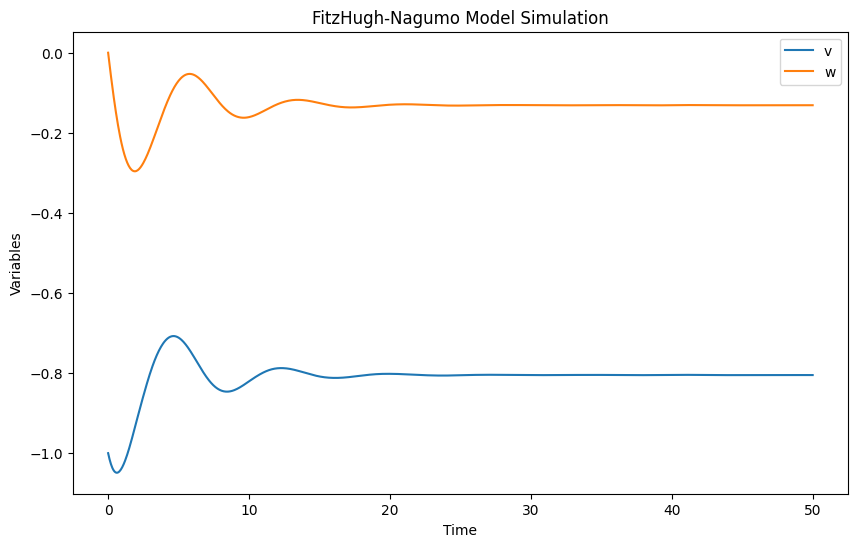

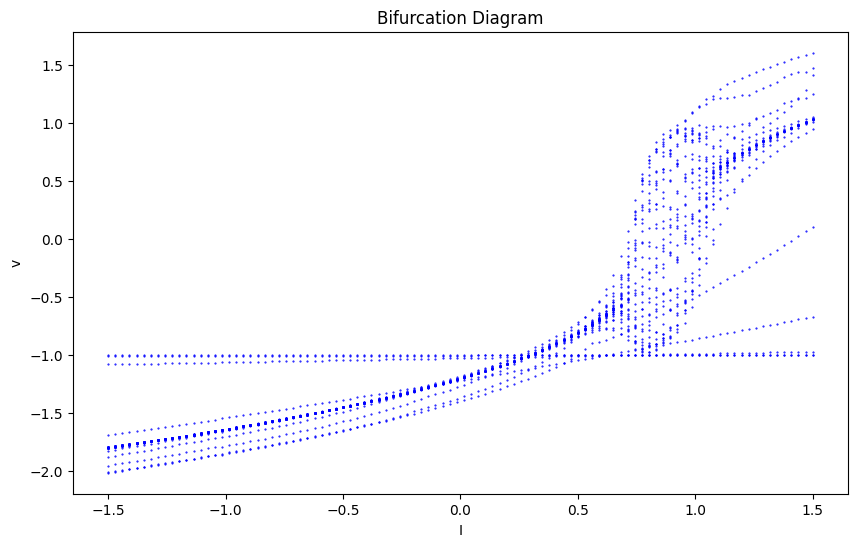

ValueError: x and y must have same first dimension, but have shapes (1,) and (100,)

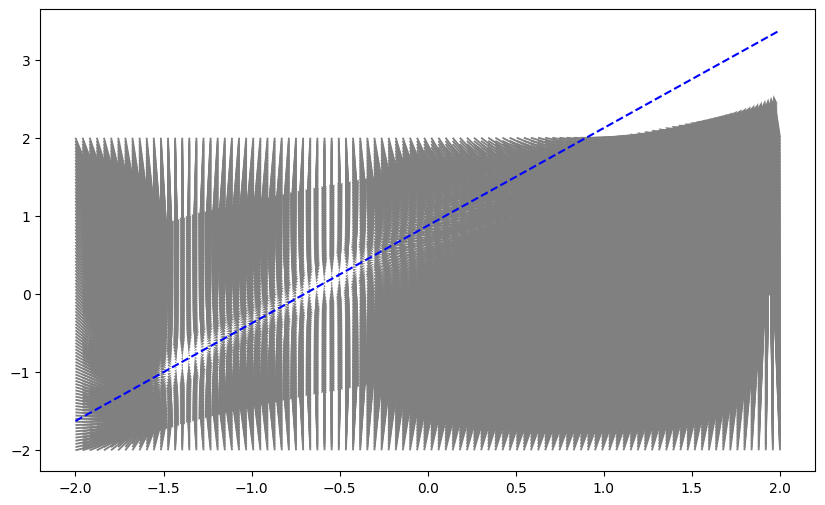

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def fitzhugh_nagumo(t, y, a, b, I):
    v, w = y
    tau = 1.0

    dv_dt = v - (v**3) / 3 - w + I
    dw_dt = (1 / tau) * (v + a - b * w)

    return [dv_dt, dw_dt]

# ODE simulation
def simulate_fitzhugh_nagumo(a, b, I):
    initial_conditions = [-1.0, 0.0]  # Initial values for v and w
    t_span = (0, 50)
    solution = solve_ivp(
        lambda t, y: fitzhugh_nagumo(t, y, a, b, I),
        t_span,
        initial_conditions,
        method='RK45',
        dense_output=True
    )

    t = np.linspace(t_span[0], t_span[1], 1000)
    sol = solution.sol(t)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(t, sol[0], label='v')
    plt.plot(t, sol[1], label='w')
    plt.title('FitzHugh-Nagumo Model Simulation')
    plt.xlabel('Time')
    plt.ylabel('Variables')
    plt.legend()
    plt.show()

# Bifurcation analysis
def bifurcation_analysis():
    I_values = np.linspace(-1.5, 1.5, 100)
    a, b = 0.7, 0.8

    plt.figure(figsize=(10, 6))

    for I in I_values:
        solution = solve_ivp(
            lambda t, y: fitzhugh_nagumo(t, y, a, b, I),
            (0, 50),
            [-1.0, 0.0],
            method='RK45',
            dense_output=True
        )
        plt.plot([I] * len(solution.t), solution.y[0], 'b.', markersize=1)

    plt.title('Bifurcation Diagram')
    plt.xlabel('I')
    plt.ylabel('v')
    plt.show()

# Phase plane analysis
def phase_plane_analysis():
    a, b, I = 0.7, 0.8, 0.5

    # Define the nullclines
    def nullcline_v(v, w):
        return v - (v**3) / 3 + I

    def nullcline_w(v, w):
        return (v + a) / b

    v_values = np.linspace(-2, 2, 100)
    w_values = np.linspace(-2, 2, 100)

    V, W = np.meshgrid(v_values, w_values)
    dV_dt = V - (V**3) / 3 + I
    dW_dt = (V + a - b * W) / 1.0  # tau = 1.0

    plt.figure(figsize=(10, 6))
    plt.quiver(V, W, dV_dt, dW_dt, scale=20, color='gray', linewidth=0.5)
    plt.plot(v_values, nullcline_w(v_values, 0), label='dw/dt = 0', linestyle='--', color='blue')
    plt.plot(nullcline_v(0, w_values), w_values, label='dv/dt = 0', linestyle='--', color='red')

    # Initial conditions and trajectory
    initial_conditions = [-1.0, 0.0]
    solution = solve_ivp(
        lambda t, y: fitzhugh_nagumo(t, y, a, b, I),
        (0, 50),
        initial_conditions,
        method='RK45',
        dense_output=True
    )
    plt.plot(solution.y[0], solution.y[1], label='Trajectory', linewidth=2, color='black')

    plt.title('Phase Plane Analysis')
    plt.xlabel('v')
    plt.ylabel('w')
    plt.legend()
    plt.show()

# Example usage
simulate_fitzhugh_nagumo(0.7, 0.8, 0.5)
bifurcation_analysis()
phase_plane_analysis()
